# Observations and Insights

1. Infubinol was the one drug of the four analyzed for the box and whisker plot that had an outlier. Ramican and Infubinol had median values near the middle of the upper and lower quartiles. Capomulin and Ceftamin had median values closer to the their upper quartiles.

2. Capomulin and Ramicane were more effective than Infubinol and Ceftamin. However, they also had more data points than the other drugs. The data shows the longer a mouse is treated, the more the volume of the tumor decreases. It would have been nice to have all of the treatments last the same amount of time to have more standardized results, but perhaps some of the mice perished. 

3. While Capomuline proved effective in reducing tumor volume, the line plot had an overall increase in tumor volume at timepoint 15. 

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_merge = pd.merge(mouse_metadata, study_results, how='outer', on=['Mouse ID'])
# Display the data table for preview
study_data_merge.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Mouse Count
study_data_merge['Mouse ID'].count()
study_data_merge

1893

# Summary Statistics

In [4]:
# Set index
study_data = study_data_merge.set_index('Mouse ID')
duplicate = study_data.loc['g989', :]

# Delete duplicate mouse
clean_study_data = study_data.drop(index='g989') 
clean_study_data.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Group by drug regimen
drug_regimen_group = clean_study_data.groupby('Drug Regimen')
# Tumor volume mean
volume_mean = drug_regimen_group['Tumor Volume (mm3)'].mean()
# Tumor volume median
volume_median = drug_regimen_group['Tumor Volume (mm3)'].median()
# Tumor volume variance
volume_variance = drug_regimen_group['Tumor Volume (mm3)'].var()
# Tumor volume standard deviation
volume_std = drug_regimen_group['Tumor Volume (mm3)'].std()
# Tumor standard error
volume_sem = drug_regimen_group['Tumor Volume (mm3)'].sem()

drug_regimen_group = pd.DataFrame({'Mean': volume_mean, 'Median': volume_median, 
                                            'Variance': volume_variance, 'Standard Deviation': volume_std, 
                                            'SEM': volume_sem})
drug_regimen_group

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [6]:
# Bar and Pie Chargs

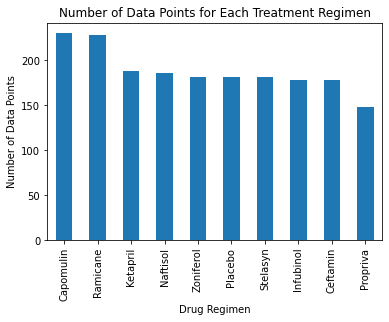

In [7]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

#Get data for graph
bar_plot = clean_study_data['Drug Regimen'].value_counts().plot.bar()

#Graph data
bar_plot.set_xlabel('Drug Regimen')
bar_plot.set_ylabel('Number of Data Points')
bar_plot.set_title('Number of Data Points for Each Treatment Regimen')

plt.show()

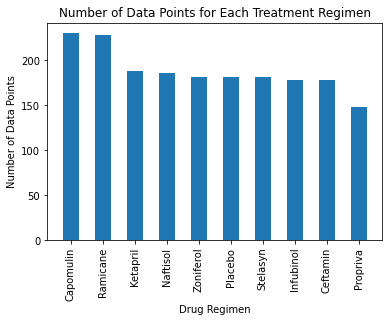

In [8]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# Get data for graph
regimen_counts = clean_study_data['Drug Regimen'].value_counts()

#Graph data
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.title('Number of Data Points for Each Treatment Regimen')
x_axis = np.arange(len(regimen_counts))

#Format graph
plt.bar(x_axis, regimen_counts, width=0.5)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, regimen_counts.index.values)
plt.xticks(rotation=90)

plt.show()

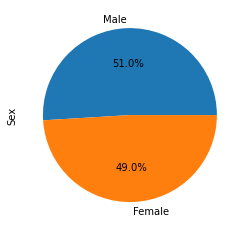

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Get data for chart
sex_count = clean_study_data['Sex'].value_counts()

#Plot chart
pie_chart = sex_count.plot.pie(autopct='%1.1f%%')

plt.show()

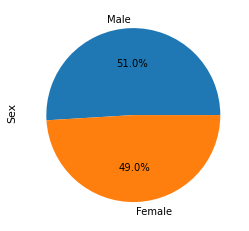

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Get data for chart
sex_count = clean_study_data['Sex'].value_counts()
labels = ['Male', 'Female']

#Format chart title
plt.title('Sex', loc='left', rotation='vertical', x=-.08, y=.45, fontsize=11)

#Plot Chart
plt.pie(sex_count, labels = labels, autopct='%1.1f%%')

plt.show()

    # Quartiles, Outliers and Boxplots

In [11]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

last_timepoint = pd.DataFrame(clean_study_data.groupby('Mouse ID')['Timepoint'].max())
                              
last_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merged_df = pd.merge(clean_study_data, last_timepoint, on='Mouse ID')
                              
merged_df.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
Mouse ID,,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0,45
k403,Ramicane,Male,21,16,5,38.825898,0,45
k403,Ramicane,Male,21,16,10,35.014271,1,45
k403,Ramicane,Male,21,16,15,34.223992,1,45
k403,Ramicane,Male,21,16,20,32.997729,1,45


In [12]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
drug_values = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
# Filter to return only the four drugs we want    
    temp_df = merged_df.loc[merged_df['Drug Regimen'] == drug]
# Filter to get maximum volume value
    final_volume_df = temp_df.loc[temp_df['Timepoint_x'] == temp_df['Timepoint_y']]
# Add values to drug_values list
    values = final_volume_df['Tumor Volume (mm3)']
    drug_values.append(values)

# Determine outliers using upper and lower bounds   
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

    outliers = (values.loc[(final_volume_df['Tumor Volume (mm3)'] >= upper_bound) |
            (final_volume_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of outliers: {outliers}.')

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Number of outliers: 0.
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Number of outliers: 0.
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
Number of outliers: 1.
The lower quartile of Ceftamin is: 48.7

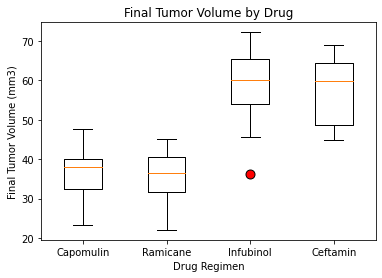

In [13]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Plot boxplot

# Format outlier flierprop
flierprops = dict(markerfacecolor='r', markersize=9)

# Insert boxplot
plt.boxplot(drug_values, flierprops=flierprops)

# Add title and labels to boxplot
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

# Line and Scatter Plots

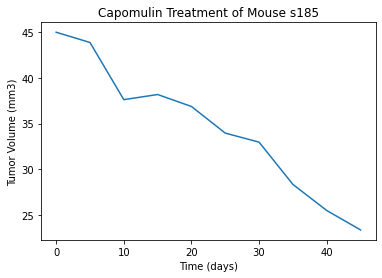

In [14]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Get data for line plot
mouse = study_data_merge[study_data_merge['Mouse ID']=='s185']

# Insert line plot
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'])

# Add labels and title to plot
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse s185")

plt.show()

# Correlation and Regression

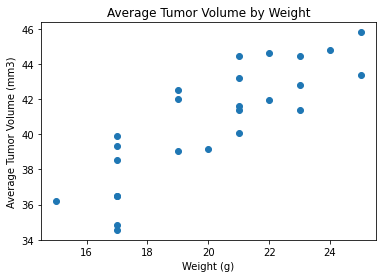

In [15]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Get data for scatter plot
capomulin = study_data_merge[study_data_merge['Drug Regimen']=='Capomulin']
capomulin_plot = capomulin.groupby('Mouse ID').mean()

# Insert scatter plot
plt.scatter(capomulin_plot['Weight (g)'], capomulin_plot['Tumor Volume (mm3)'])

# Format scatter plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()

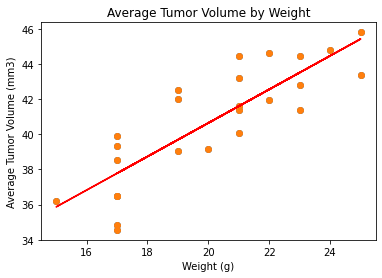

In [21]:
# Calculate linear regression
x_values = capomulin_plot['Weight (g)']
y_values = capomulin_plot['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

regress_values = capomulin_plot['Weight (g)'] * slope + intercept

plt.scatter(capomulin_plot['Weight (g)'], capomulin_plot['Tumor Volume (mm3)'])

# Plot linear regression on top of scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")

# Format scatter plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()
